In [1]:

from dense_image_aligment.transformations.reprojection import ReprojectionTransformation
from dense_image_aligment import read_as_grayscale
from dense_image_aligment import show_data

import numpy as np 
import matplotlib.pyplot as plt
import cv2 
from glob import glob 
import pandas as pd 
from pathlib import Path 

In [2]:
root_data = Path('./datasets/Multi-FoV/data')
info_intensity_images = pd.read_csv('./datasets/Multi-FoV/info/images.txt', names=['image_id', 'timestamp' , 'path_to_img'], sep=" ")
info_depth_images = pd.read_csv('./datasets/Multi-FoV/info/depthmaps.txt', names=['image_id', 'path_to_img'], sep=" ")

In [3]:
image_id = 196

intensity_fname = info_intensity_images[info_intensity_images['image_id'] == image_id]['path_to_img'].values[0]
image_intensity = read_as_grayscale(str(root_data / intensity_fname))

depth_fname = info_depth_images[info_depth_images['image_id'] == image_id]['path_to_img'].values[0]
image_depth = np.loadtxt(str(root_data / depth_fname)).reshape(image_intensity.shape[:2])

print(intensity_fname)
image_intensity.shape, image_depth.shape


image = np.concatenate(
    [
        image_intensity[..., None], 
        image_depth[..., None]
    ],
    axis=2
)


img/img0196_0.png


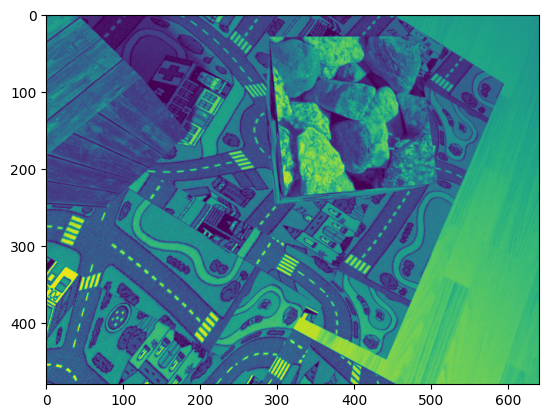

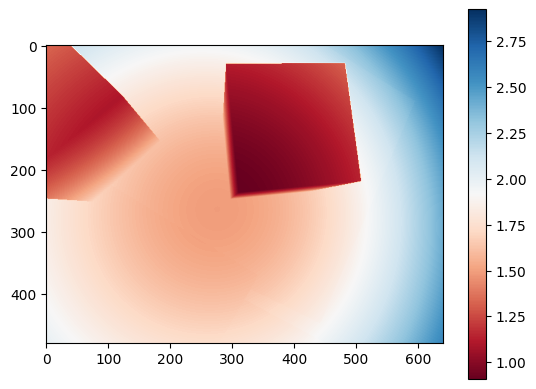

In [4]:
plt.imshow(image[:, :, 0])
plt.show()

fig, (ax1) = plt.subplots(ncols=1)
image_show = ax1.imshow(image[:, :, 1], cmap='RdBu')
cbar = fig.colorbar(image_show, ax=ax1)
plt.show()

In [23]:
camera_params_path = './datasets/Multi-FoV/info/intrinsics copy.txt'
with open(camera_params_path) as f: 
    data = f.read() 
    data = data.split('=')[-1]
    
    K = np.array(eval(data))

In [55]:
p_init = np.array(
    [0., np.pi/6, 0., -0.5, 0., 1.],
    dtype=np.float32
)
transform = ReprojectionTransformation(p_init=p_init, intrinsic=K.reshape(-1))

In [56]:
image_transformed = transform.apply_transformation(image, shape=image.shape[:2])

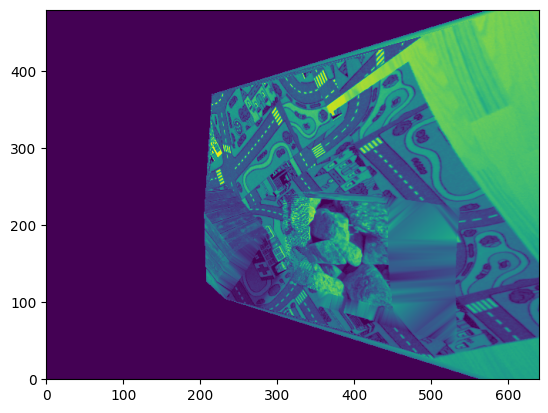

In [57]:
plt.imshow(image_transformed, origin='lower')
plt.show()